# We Can use twitter api here for sentimental analysis

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)


In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [19]:
# Function to predict sentiment of a single tweet
def predict_sentiment(tweet):
    encoded_tweet = tokenizer(tweet, truncation=True, padding=True, return_tensors="pt", max_length=128)
    input_ids = encoded_tweet["input_ids"]
    attention_mask = encoded_tweet["attention_mask"]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

    if predicted_label == 1:
        return "positive"
    else:
        return "negative"

# Sample 500 tweets

In [21]:
new_tweets = [
    "I absolutely love this app, it's amazing!",
    "Worst purchase I ever made, totally regret it.",
    "The service was decent, nothing special.",
    "Highly recommend this to everyone, it's fantastic!",
    "Not worth the money, very disappointed.",
    "Such a great product, exceeded my expectations!",
    "I am so happy with my purchase, will buy again.",
    "This is awful, don’t waste your money.",
    "Not a fan, I don’t think it lives up to the hype.",
    "One of the best things I’ve bought in a while!",
    "I don’t recommend it, didn’t work as advertised.",
    "Very happy with my decision, great quality.",
    "Completely useless, waste of time and money.",
    "Okay product, but I expected more.",
    "This company is amazing, I’m a loyal customer now.",
    "The quality is poor, I'm very disappointed.",
    "Absolutely fantastic! Worth every penny.",
    "I’m really impressed with this, will definitely buy again.",
    "Not a great experience, would not purchase again.",
    "It’s good, but not great. I’m on the fence.",
    "I love how easy it is to use, great design.",
    "Terrible customer service, not helpful at all.",
    "Great value for money, exceeded my expectations.",
    "I had high hopes, but it didn’t live up to them.",
    "The product works fine, but the packaging was terrible.",
    "This product has changed my life, can’t live without it!",
    "I don’t like it, too complicated to use.",
    "Perfect for my needs, I’m very happy.",
    "Wouldn’t recommend, quality is lacking.",
    "Great quality, but it took too long to arrive.",
    "Extremely happy with my purchase, five stars.",
    "Not impressed, expected better performance.",
    "The best purchase I’ve made in a while, absolutely love it!",
    "I hate this product, it broke within days.",
    "I’m neutral on this one, it’s okay but not great.",
    "So glad I found this, it’s exactly what I needed.",
    "Poor build quality, not durable at all.",
    "Love it! Would definitely recommend to friends.",
    "The instructions were unclear, but I figured it out.",
    "Very satisfied, this product is just what I needed.",
    "It’s just average, nothing special about it.",
    "Not good, stopped working after a few uses.",
    "Definitely worth the investment, no regrets.",
    "I expected better for the price.",
    "Amazing product, I would buy again in a heartbeat!",
    "The product didn’t meet my expectations at all.",
    "I’m a huge fan of this product, it’s a game changer.",
    "It doesn’t work as advertised, very disappointed.",
    "Best purchase I’ve made in months, love it.",
    "I would not recommend this product to anyone.",
    "I’m really satisfied with my purchase, definitely worth it.",
    "The quality was terrible, I’m returning it.",
    "Can’t believe how good this product is, I’m amazed.",
    "It’s okay, but the shipping was delayed.",
    "I’m impressed with how well it works, highly recommend it.",
    "The experience was fine, but I expected more for the price.",
    "This product is amazing, works perfectly.",
    "The product was damaged when it arrived, not happy.",
    "It’s alright, but I expected something better.",
    "So happy I bought this, it’s worth every penny.",
    "Don’t waste your money on this, it’s not worth it.",
    "I’m neutral about this, it’s not great but not terrible.",
    "Incredible quality, will buy from this brand again.",
    "The product doesn’t work as expected, very disappointed.",
    "Fantastic product, exceeded my expectations!",
    "I had a bad experience with this, not happy at all.",
    "Absolutely love it, it’s exactly what I needed.",
    "I can’t believe how bad this is, total waste.",
    "It’s good but could be better, still happy with it.",
    "I love this product, will buy more in the future.",
    "This product didn’t meet my expectations at all.",
    "Great service, I’ll be a returning customer.",
    "I can’t recommend this enough, it’s amazing!",
    "It’s fine, but I’ve had better.",
    "The product works well, but the packaging was awful.",
    "I’m not satisfied, it broke too quickly.",
    "Good product, but the customer service was terrible.",
    "Totally worth the price, I’m in love with it!",
    "I expected more from this, not very impressed.",
    "The best product I’ve used in years, I’m amazed.",
    "I don’t think it’s worth the price, very average.",
    "Totally happy with my purchase, 10/10 would recommend.",
    "Not happy with my purchase at all, very disappointed.",
    "I’m obsessed with this product, can’t recommend it enough!",
    "I didn’t like it, too complicated to set up.",
    "Best purchase of the year, love it.",
    "I’m not a fan, didn’t meet my expectations.",
    "Good, but could use some improvements.",
    "This is exactly what I needed, very satisfied.",
    "Wouldn’t buy again, not good quality.",
    "Amazing quality, I’ll definitely buy more.",
    "Disappointed, it didn’t work as expected.",
    "Perfect, just what I was looking for.",
    "Not happy with this at all, it’s very slow.",
    "I would definitely buy this again, great value.",
    "Not bad, but there are better options.",
    "I’m really happy with this product, five stars.",
    "Very poor quality, I’m returning it.",
    "Best investment ever, love this!",
    "The service was terrible, I’ll never buy again.",
    "I’m impressed with the quality, highly recommend.",
    "Could be better, but I’m satisfied overall.",
    "Totally worth the price, I’m very happy.",
    "I’m extremely disappointed, wouldn’t recommend it.",
    "Love it! Works perfectly for my needs.",
    "I’m not sure if I would buy this again.",
    "I’ve had a great experience, will buy more.",
    "I’m so happy with this, it’s exactly what I wanted.",
    "Don’t waste your money, the quality is awful.",
    "This is an amazing product, I’m a huge fan.",
    "I would never buy this again, very unhappy.",
    "Great purchase, exactly as described.",
    "Terrible quality, don’t buy it.",
    "Highly recommend, it’s worth every penny.",
    "It’s okay, but I think I could’ve gotten better elsewhere.",
    "This product is worth every cent, amazing quality.",
    "I’m not happy with my purchase at all.",
    "Love it! Definitely will recommend to others.",
    "It works okay, but not as well as advertised.",
    "It’s decent, but I was hoping for more.",
    "Love this! Will definitely buy again.",
    "Disappointed with the product, it’s not durable.",
    "Very impressed, works great.",
    "I regret buying this, didn’t meet my expectations.",
    "Wouldn’t buy it again, not happy with the product.",
    "This product exceeded my expectations, totally worth it.",
    "I’m not a fan of this, didn’t work as described.",
    "Amazing product, five stars all the way!",
    "Worst purchase I’ve made, regret it so much.",
    "It’s okay, but not for the price.",
    "I’m extremely satisfied with this product.",
    "This product didn’t live up to the hype.",
    "Totally happy with this, it’s perfect.",
    "I’m really impressed with the performance, highly recommend.",
    "Wouldn’t buy again, the quality was poor.",
    "Amazing value for money, can’t believe how good this is.",
    "It’s fine, but I think I’ll return it.",
    "I’m so happy with this, I can’t stop using it.",
    "Worst customer service ever, won’t buy again.",
    "Great product, would recommend it to anyone.",
    "Doesn’t work as well as expected, disappointing.",
    "The quality is top-notch, worth every penny.",
    "It’s okay, but it didn’t meet my expectations.",
    "I love this, definitely worth the price.",
    "Terrible experience, won’t buy again.",
    "Absolutely amazing, one of the best products I’ve used.",
    "I had high hopes, but it didn’t work for me.",
    "Best decision ever, I’m so happy with this.",
    "Wouldn’t recommend it, very disappointed.",
    "Perfect for my needs, I’m so happy I bought this.",
    "This is a scam, don’t fall for it.",
    "Great experience, I’ll definitely buy again.",
    "It’s fine, but there are better products out there.",
    "Love this product! It works just as expected.",
    "Terrible quality, broke after a few days.",
    "Not impressed at all, really poor quality.",
    "So good! I’m so glad I purchased this.",
    "The customer support was awful, I’ll never buy again.",
    "Totally recommend this, it’s amazing.",
    "I wouldn’t recommend this to anyone, very bad.",
    "The product works fine, but the shipping was a nightmare.",
    "Amazing, it’s changed my daily routine!",
    "I’m not impressed, it doesn’t work as expected.",
    "This is an excellent product, I’m very happy with it.",
    "It’s okay, but I expected better quality.",
    "Love it! Would highly recommend.",
    "Really disappointing, didn’t meet my expectations at all.",
    "Definitely recommend this product to others, it’s great.",
    "I don’t think it’s worth the price, not happy.",
    "Great product! I’ll definitely be buying again.",
    "I don’t like it at all, it didn’t work for me.",
    "Amazing quality, definitely worth the price.",
    "I’m really happy with it, works as expected.",
    "This is a game changer, so happy I bought it!",
    "Waste of money, it broke after a week.",
    "Good quality, but took too long to arrive.",
    "Totally love this, best decision ever.",
    "I don’t recommend this product, very poor quality.",
    "It’s a decent product, but it didn’t meet my expectations.",
    "Not happy with my purchase, sending it back.",
    "Best purchase in a while, can’t wait to use it more.",
    "The product didn’t work at all, very disappointing.",
    "Not worth the price, the quality is lacking.",
    "Very happy with my purchase, will definitely buy again.",
    "This is amazing! Works perfectly.",
    "Not what I expected at all, very disappointed.",
    "Love this product, can’t believe how great it is!",
    "Absolutely terrible, don’t waste your money.",
    "Not the best, but it works fine for the price.",
    "Extremely happy with my purchase, I’ll recommend it to others.",
    "It’s okay, but the quality could be better.",
    "Totally worth it! Love this product.",
    "Horrible, don’t buy it.",
    "This is exactly what I needed, I’m so happy!",
    "Not what I expected, I’m returning it.",
    "I highly recommend this, it works great!",
    "Very poor, didn’t work at all.",
    "I absolutely love it, so happy with my purchase!",
    "Worst decision ever, I’m so disappointed.",
    "It’s fine, but I wouldn’t buy again.",
    "Amazing product, works exactly as described.",
    "This didn’t meet my expectations at all.",
    "Love this! Highly recommend it to everyone.",
    "I wouldn’t buy this again, very poor quality.",
    "It’s fine, but not worth the price.",
    "This is the best product I’ve ever used!",
    "Terrible, don’t waste your time or money.",
    "The best product I’ve bought in a while, I’m so happy!",
    "I’m really disappointed, it didn’t work at all.",
    "It works well, but could be improved.",
    "I love it, would definitely buy again.",
    "Absolutely love it, works as expected.",
    "This is great, I’m definitely buying more!",
    "Not worth it, I expected much more.",
    "Really happy with this, great value for the price.",
    "I’m not sure I would buy this again.",
    "Amazing product! I would recommend it to everyone.",
    "Not great, but it’s fine for the price.",
    "I’m so happy with this, worth every penny.",
    "Worst experience ever, I would never buy again.",
    "Best purchase I’ve made this year!",
    "I don’t recommend this, it’s not as good as I thought.",
    "Love it, would recommend it to friends!",
    "This is the worst product I’ve ever bought.",
    "Perfect, would definitely buy again!",
    "It didn’t meet my expectations at all.",
    "Really satisfied with my purchase.",
    "Great product, works just as expected.",
    "I’ll never buy this again, it didn’t work.",
    "So happy with my purchase, highly recommend it.",
    "This is just okay, not great but works.",
    "Love it! Definitely a must-have.",
    "Very poor quality, wouldn’t buy again.",
    "I don’t think this is worth the money.",
    "This is a great product, very happy with it.",
    "I’m happy with this purchase, but the quality could be better."
]


# predection

Total Tweets: 236
Positive Tweets: 96 (40.68%)
Negative Tweets: 140 (59.32%)

Top 5 Positive Tweets:
- I absolutely love this app, it's amazing!
- Highly recommend this to everyone, it's fantastic!
- One of the best things I’ve bought in a while!
- Very happy with my decision, great quality.
- Okay product, but I expected more.

Top 5 Negative Tweets:
- Worst purchase I ever made, totally regret it.
- The service was decent, nothing special.
- Not worth the money, very disappointed.
- Such a great product, exceeded my expectations!
- I am so happy with my purchase, will buy again.


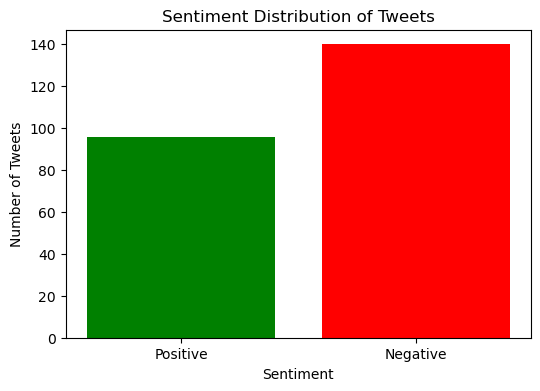

In [22]:
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")
model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")

# Function to predict sentiment using the model
def predict_sentiment(tweet):
    inputs = tokenizer(tweet, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()
    
    # Assuming 0 is negative and 1 is positive
    return 'positive' if prediction == 1 else 'negative'

# Variables to count positive and negative sentiments
positive_count = 0
negative_count = 0
positive_tweets = []
negative_tweets = []

# Iterate through the tweets and predict sentiment
for tweet in new_tweets:
    sentiment = predict_sentiment(tweet)
    if sentiment == 'positive':
        positive_count += 1
        positive_tweets.append(tweet)
    elif sentiment == 'negative':
        negative_count += 1
        negative_tweets.append(tweet)

# Calculate percentages
total_tweets = len(new_tweets)
positive_percentage = (positive_count / total_tweets) * 100
negative_percentage = (negative_count / total_tweets) * 100

# Print results
print(f"Total Tweets: {total_tweets}")
print(f"Positive Tweets: {positive_count} ({positive_percentage:.2f}%)")
print(f"Negative Tweets: {negative_count} ({negative_percentage:.2f}%)")

# Get top 5 positive and 5 negative tweets
top_5_positive = positive_tweets[:5]
top_5_negative = negative_tweets[:5]

print("\nTop 5 Positive Tweets:")
for tweet in top_5_positive:
    print(f"- {tweet}")

print("\nTop 5 Negative Tweets:")
for tweet in top_5_negative:
    print(f"- {tweet}")

# Plot the sentiment distribution
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'red'])
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()
